
Goals:

* Basic Machine Learning understanding
* Perceptron algorithm
* Multi-layer Adaline algorithm


In [1]:
# All libraries we use for this HW, run this block first!
#%tensorflow_version 2.x
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
np.random.seed(8)

# Question 1
Run and read the following code blocks and answer following question:

1.   Which learning scheme is used (i.e. supervised, unsupervised or reinforcment learning)?
2.   How do we interpret the results? 
3.   Are they good results, if not, what wrong with them?



### **a)** First block

Features name: ['Chins', 'Situps']
Target name  : Weight


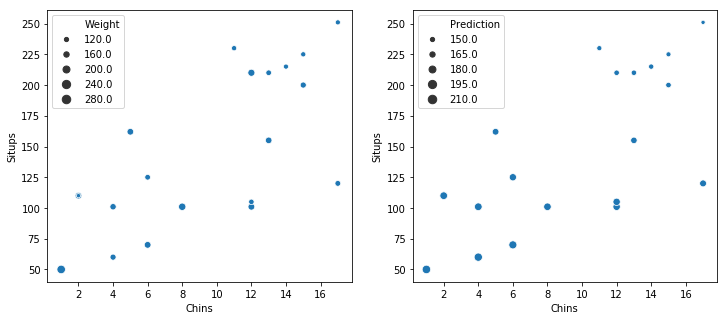

In [2]:
# Description of the dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud
data = load_linnerud()
X = data.data[:, :2]  # only take first 2 features
y = data.target[:, 0]  # only take first target
print("Features name:", data.feature_names[:2])
print("Target name  :", data.target_names[0])

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


def plot_helper(chins, situps, weight, prediction):
  plt.figure(figsize=(12, 5))
  ax = plt.subplot(1, 2, 1)
  sns.scatterplot(x="Chins",
                  y="Situps",
                  size='Weight',
                  data=pd.DataFrame({
                      'Chins': chins,
                      'Situps': situps,
                      'Weight': weight
                  }),
                  ax=ax)
  ax = plt.subplot(1, 2, 2)
  sns.scatterplot(x="Chins",
                  y="Situps",
                  size='Prediction',
                  data=pd.DataFrame({
                      'Chins': chins,
                      'Situps': situps,
                      'Prediction': prediction
                  }),
                  ax=ax)

plot_helper(chins=X[:, 0], situps=X[:, 1], weight=y, prediction=y_pred)

ANSWERS OF QUESTION 1 - Block A
--------------------------------------------------------------------------------------------------------

**1. Which learning scheme is used ? ( Supervised, Unsupervised or Reinforcement ? )**

   It is a **Supervised** Algorithm.We can understand from the line,
   
   **model=LinearRegression()**
   
   here the LinearRegression model is used which is a member of supervised learning, we have input variables (X) and an        output variable (y) and we use an algorithm to learn the mapping function from the input to the output Y = f(X) .And we    have a labeled data when we are trying to train our model with the following line.
   
   **model.fit(X, y)**
   
   A regression problem is when the output variable is a real or continuous value, such as  “weight”. Many                    different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane        which goes through the points.
  
**2. How do we interpret the result ?**

   We plotted two scatter-plot above.In the first one the size of the data points are the real weights.In the second one 
   the size of the data points are the predicted weights.After training model with the labeled data we used the same data      to test the model, so even if our model made good predictions for this test, it may won't answer successfully when we      test our model with the out-of sample data.But we use the regression algorithms with continuous values on their label.
   
**3.Are they good results, if not, what wrong with them?**

   We need to focus on the size of data points when we want to compare the results of real values and predicted results.
   Because in the first visualization, size of the data points indicates the real values, and in the second visualization
   size of the data points indicates predicted results.So when we look at the sizes they are different.There may be several 
   reasons of getting bad results as following,
   * A linear regression model may in fact be appropriate but there is a lot of noise in the data.
   * There may be non-linear associations, which could be modelled with linear model (by including non-linear terms in the model or by using an additive model) - alternatively a non-linear model may be more appropriate.
   
   

### **b)** Second block

Text(0, 0.5, 'Situps')

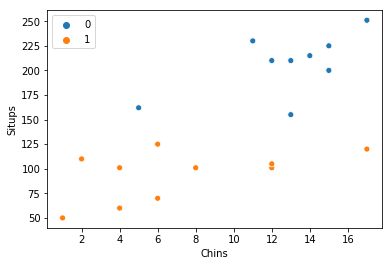

In [3]:
# We use the same dataset in a)
model = KMeans(2)
model.fit(X)
y_pred = model.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.xlabel('Chins')
plt.ylabel("Situps")

<h1>ANSWERS OF QUESTION 1 - Block B</h1>

**1. Which learning scheme is used ? ( Supervised, Unsupervised or Reinforcement ? )**

K-means clustering is one of the unsupervised machine learning algorithms.Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.A cluster refers to a collection of data points aggregated together because of certain similarities.
You’ll define a target number k ( here in the above algorithm k is initialized to 2 ), which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

**2. How do we interpret the result ?**

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm some assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

Here in the above visualization we define k=2.That means we want our algorithm to classify data points into two clusters.
As it can be seen in the above graph one of the groups was indicated with orange( 1 ) and the other group as indicated with blue( 0 ).

**3.Are they good results, if not, what wrong with them?**

When we are given an unlabeled data, if our unsupervised model was able to differentiate between two different groups, and if these groups were easily seperable when we look at it, it means that the results are good.But if there was a noise in the data and the data points from two different groups are mixed and they were not easily separable, then it means that our models prediction results will not be so much countable when we want to test it with a new data.

# Question 2

### **a)** Filling in `TODO` of following code block to: _Create perceptron and use it to solve an AND classification problem_

Calculating the output of perceptron:

$y= \mathrm{F} \big( \sum_{i=0}^D w_i \cdot x_i \tag{1} \big)$

where $x_0=1$, $D$ is the number of input features, and $\mathrm{F}(.)$ is the threshold function, i.e.

$\mathrm{F}(x) =
  \begin{cases}
    1       & \quad \text{if } x \geq \mathrm{THRESHOLD}\\
    0  & \quad \text{if } x < \mathrm{THRESHOLD}
  \end{cases}$

The learning algorithm of perceptron following this update equation:

$w_i = w_i + \lambda \cdot \frac{1}{N} \sum_{j=0}^N(\bar{y}^{(j)} - y^{(j)}) x^{(j)}_i \tag{2}$

where $N$ is the total number of training examples, $\bar{y}$ is the predicted value of $y$ (the target variable), $(j)$ is the index of an example, and $\lambda$ is the learning rate.

In [20]:
# Number of training iterations
NUM_ITERATIONS = 25
# Threshold for 0/1 classification
THRESHOLD = 0.5
# Learning rate
LEARNING_RATE = 1e6

X = np.array(
    [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]
)
# TODO: fill appropriate value for y
y = np.array([[0,0,0,1]])

# Create perceptron weights (random weights)
weights = np.random.randn(2)

# Train perceptron
for iteration in range(NUM_ITERATIONS):
  # TODO: Calculate predictions with current weights (Equation (1))
  predictions=np.zeros(X.shape[0])
  activation=np.dot(X,weights.T)
  for i in range( X.shape[0] ):
     if activation[i] >= THRESHOLD:
        predictions[i]=1
     else:
        predictions[i]=0 
  
  # Calculate accuracy (not needed for training, but to track the learning progress)
  accuracy = np.mean(predictions == y)
  # Print the accuracy
  print("Iteration %d: Acc %f \t %s" % (iteration, accuracy, str(predictions)))

  # TODO: Update weights according to update rule (Equation (2))
  
  for i in range(X.shape[1]):
        y_hat = predictions[i]
        if y[0][i]-y_hat == 1:
            weights[0] += X[i][0]*LEARNING_RATE*(y[0][i]-y_hat)
            weights[1] += X[i][1]*LEARNING_RATE*(y[0][i]-y_hat)
            
        elif y[0][i]-y_hat == -1:
            weights[0] -= X[i][0]*LEARNING_RATE*(y[0][i]-y_hat)
            weights[1] -= X[i][1]*LEARNING_RATE*(y[0][i]-y_hat)
            
           

# Print weights for inspection
print(weights)


Iteration 0: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 1: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 2: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 3: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 4: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 5: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 6: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 7: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 8: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 9: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 10: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 11: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 12: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 13: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 14: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 15: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 16: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 17: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 18: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 19: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 20: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 21: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 22: Acc 0.750000 	 [0. 0. 1. 1.]
Iteration 23: Acc 0.7

### **b)** In theory the perceptron algorithm should be able to solve the `AND` classification problem (i.e. give 100% accuracy). What is missing from above procedure? Could you make it work?

Normally, since it is an binary classification by AND it is linearly separable.But in the above code section the equation was designed as following,

activation = np.dot(inputs, weights.T ) // that means we have just multiplied weights with inputs

But actually, the linear equation form must be,

summation = np.dot(inputs, weights.T ) + bias // so if we add the bias in this equation, we can get more true equation



In [21]:
#We can make it work as follows

import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                # Here we updated both coefficients and bias, in the weights[]
                # weights[1:] contains the coefficients
                # weights[0] contains the bias
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

list_pred=[]
inputs = np.array([1, 1])
print(perceptron.predict(inputs)) 
list_pred.append(perceptron.predict(inputs))
#=> 1

inputs = np.array([0, 1])
print(perceptron.predict(inputs))
list_pred.append(perceptron.predict(inputs))
#=> 0

inputs = np.array([1, 0])
print(perceptron.predict(inputs))
list_pred.append(perceptron.predict(inputs))

inputs = np.array([0, 0])
print(perceptron.predict(inputs))
list_pred.append(perceptron.predict(inputs))

accuracy = np.mean(labels==list_pred)

print("Accuracy is : ", accuracy )

#Now we get the true values for AND classification

1
0
0
0
Accuracy is :  1.0


# Question 3

Create multi-layer Adaline in `pytorch` or `tensorflow` (you only need to do **a)** or **b)** part of this question)

Approximation Error for Adaline is given by:

$E = \frac{1}{2} (\bar{y} - y)^2 \tag{3}$

where $\bar{y}$ is the predicted value of $y$ (the target variable)

Your tasks are divided into 2 steps:

1. First filling in the `TODO`, create a multi-layer Adaline, and make the algorithm running
2. Modifying the training procedure to get reasonable better results.

We will use the `linnerud` dataset from `Question 1` as training data

In [61]:
X = data.data  # take all features
y = data.target[:, 0]  # only take first target
print("Features name:", data.feature_names)
print("Target name  :", data.target_names[0])

Features name: ['Chins', 'Situps', 'Jumps']
Target name  : Weight


### b) Multi-layer Adaline with `tensorflow`

Documentation for `tensorflow` and `keras` for neural network:

https://www.tensorflow.org/guide/keras/overview

Epoch 0   Error:  16126.485825280277
Epoch 1   Error:  12850.234183191107
Epoch 2   Error:  3814.928452425172
Epoch 3   Error:  1135.9928974063573
Epoch 4   Error:  492.82413393605196
Epoch 5   Error:  338.37671106238554
Epoch 6   Error:  301.289615018874
Epoch 7   Error:  292.3841320190534
Epoch 8   Error:  290.24573288078903
Epoch 9   Error:  289.73225816206525
Epoch 10  Error:  289.60896214259236
Epoch 11  Error:  289.5793561973744
Epoch 12  Error:  289.5722471934003
Epoch 13  Error:  289.57054017358803
Epoch 14  Error:  289.570130282605
Epoch 15  Error:  289.5700318592418
Epoch 16  Error:  289.5700082257333
Epoch 17  Error:  289.57000255082477
Epoch 18  Error:  289.5700011881495
Epoch 19  Error:  289.57000086093086
Epoch 20  Error:  289.5700007823472
Epoch 21  Error:  289.57000076346617
Epoch 22  Error:  289.5700007589205
Epoch 23  Error:  289.57000075781724
Epoch 24  Error:  289.57000075754075


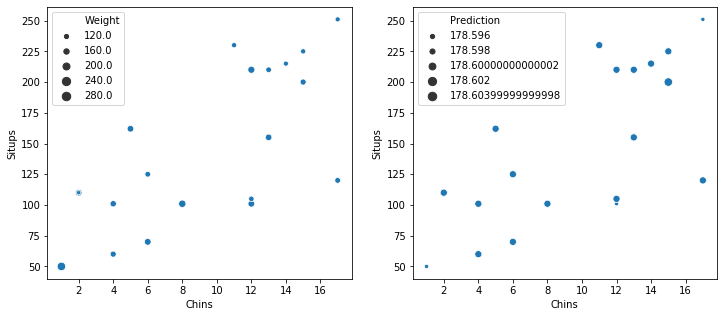

In [62]:
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

# TODO: modify this single-layer Adaline into multi-layer adaline
#network = keras.layers.Dense(1)


network = keras.models.Sequential()

# add input layer
network.add(keras.layers.Dense(
    units=50,
    input_dim=X.shape[1],
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation='tanh') 
)
# add hidden layer
network.add(
    keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh')
    )
# add output layer
network.add(
    keras.layers.Dense(
        units=1,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='relu')
    )


def approximation_error(y_pred, y_true):
  # TODO: finish this function and return the approximation error of Adaline (Equation 3)
  loss = 1/2*tf.pow(y_pred - y_true, 2)
  return loss



# create Gradient descent optimizer
optimizer = keras.optimizers.SGD(lr=0.01)

# iterate for 25 epochs
for i in range(25):
  # forward
  with tf.GradientTape() as tape:
    y_pred = network(X)
    loss = tf.reduce_mean(approximation_error(y_pred, y))

  # backward
  gradients = tape.gradient(loss, network.trainable_variables)
  # optimize
  optimizer.apply_gradients(zip(gradients, network.trainable_variables))

  # Print out error for monitoring
  print("Epoch %-3d" % i, "Error: ", loss.numpy())

# Evaluate our final prediction
y_pred = network(X).numpy()

y=y.reshape(-1,)

#y_pred=y_pred.reshape(1,20)
plot_helper(chins=X[:, 0], situps=X[:, 1], weight=y, prediction=y_pred.ravel())

